In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:\\Users\\Mubasshira\\Downloads\\books_data.csv")
df.head()

,Unnamed: 0,Book,Series,Release number,Author,Description,Num Pages,Format,Genres,Publication Date,Rating,Number of voters
0,0,The Restaurant at the End of the Universe,The Hitchhiker's Guide to the Galaxy,2,Douglas Adams,Facing annihilation at the hands of the warlik...,250.0,Paperback,"['Science Fiction', 'Fiction', 'Humor', 'Fanta...","October 12, 1980",4.21,283375
1,1,The Name of the Rose,NaN,NaN,Umberto Eco,The year is 1327. Benedictines in a wealthy It...,536.0,Paperback,"['Fiction', 'Historical Fiction', 'Mystery', '...","January 1, 1980",4.14,360732
2,2,The Clan of the Cave Bear,Earth's Children,1,Jean M. Auel,This novel of awesome beauty and power is a mo...,512.0,Paperback,"['Historical Fiction', 'Fiction', 'Fantasy', '...","January 1, 1980",4.09,264630
3,3,Firestarter,NaN,NaN,Stephen King,The Department of Scientific Intelligence (aka...,564.0,Mass Market Paperback,"['Horror', 'Fiction', 'Thriller', 'Science Fic...","September 29, 1980",3.91,226270
4,4,Cosmos,NaN,NaN,Carl Sagan,The story of fifteen billion years of cosmic e...,384.0,Mass Market Paperback,"['Science', 'Nonfiction', 'Physics', 'Astronom...","January 1, 1980",4.39,144686


# Data Cleaning

In [3]:
df.drop(columns=["Unnamed: 0", "Series", "Release number"], inplace=True)
df['Description'].fillna("Unknown", inplace=True)
mean_val_num_pages = df['Num Pages'].mean()
df['Num Pages'].fillna(mean_val_num_pages, inplace=True)
df = df.dropna(subset=['Format', 'Publication Date'])

In [4]:
df['Format'] = df['Format'].str.replace(r"[\[\]']", '', regex=True)
df['Format'] = df['Format'].str.lower()

In [5]:
df['Num Pages'] = df['Num Pages'].astype(int)

In [6]:
df['Publication Date'] = df['Publication Date'].str.replace("Published ", '')

In [7]:
df['Publication Date'] = pd.to_datetime(df['Publication Date'], errors='coerce')

# Extract day, month, and year into separate columns
df['Day'] = df['Publication Date'].dt.day.astype(int)
df['Month'] = df['Publication Date'].dt.month.astype(int)
df['Year'] = df['Publication Date'].dt.year.astype(int)

In [8]:
df['Format'].value_counts()

Format
paperback                1827
hardcover                1368
mass market paperback     719
kindle edition            265
ebook                     135
audio cd                   14
nook                       14
board book                 12
audio cassette              9
library binding             9
trade paperback             5
unknown binding             2
audiobook                   2
broschiert                  1
slipcased hardcover         1
print                       1
paper                       1
Name: count, dtype: int64

# Data Visualization

# How does the number of publications vary over the years?

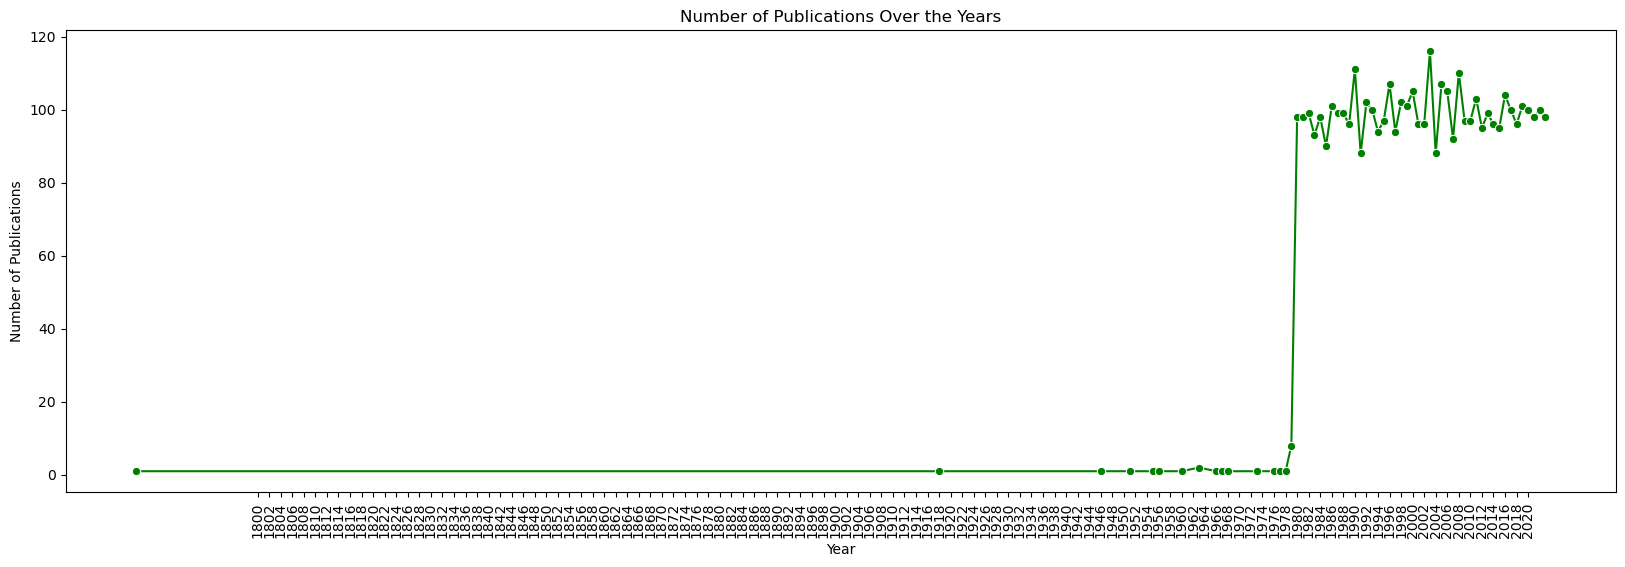

In [9]:
publications_per_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(20,6))
sns.lineplot(x=publications_per_year.index, y=publications_per_year.values, marker='o', color='green')
custom_ticks = range(1800, 2022, 2)
plt.xticks(custom_ticks, [str(year) if year % 2 == 0 else '' for year in custom_ticks], rotation=90)
plt.title('Number of Publications Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.show()
plt.show()

# Are there specific months where more books are published?

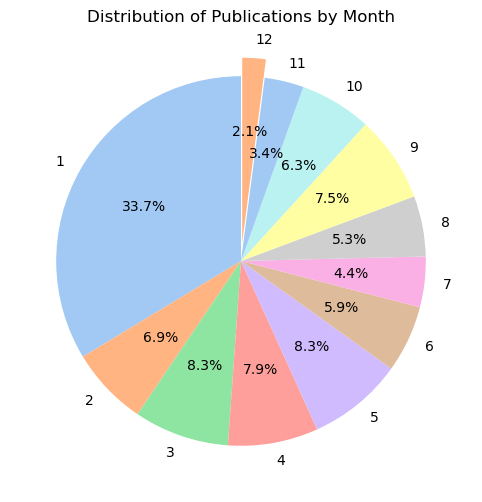

In [10]:
publications_per_month = df['Month'].value_counts().sort_index()
explode = [0] * 11 + [0.1] 

plt.figure(figsize=(12, 6))
plt.pie(publications_per_month.values, labels=publications_per_month.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), explode=explode)
plt.title('Distribution of Publications by Month')
plt.show()


**Books are published at a higher rate in the months of January, March, and May.**

# What is the distribution of book ratings in the dataset?

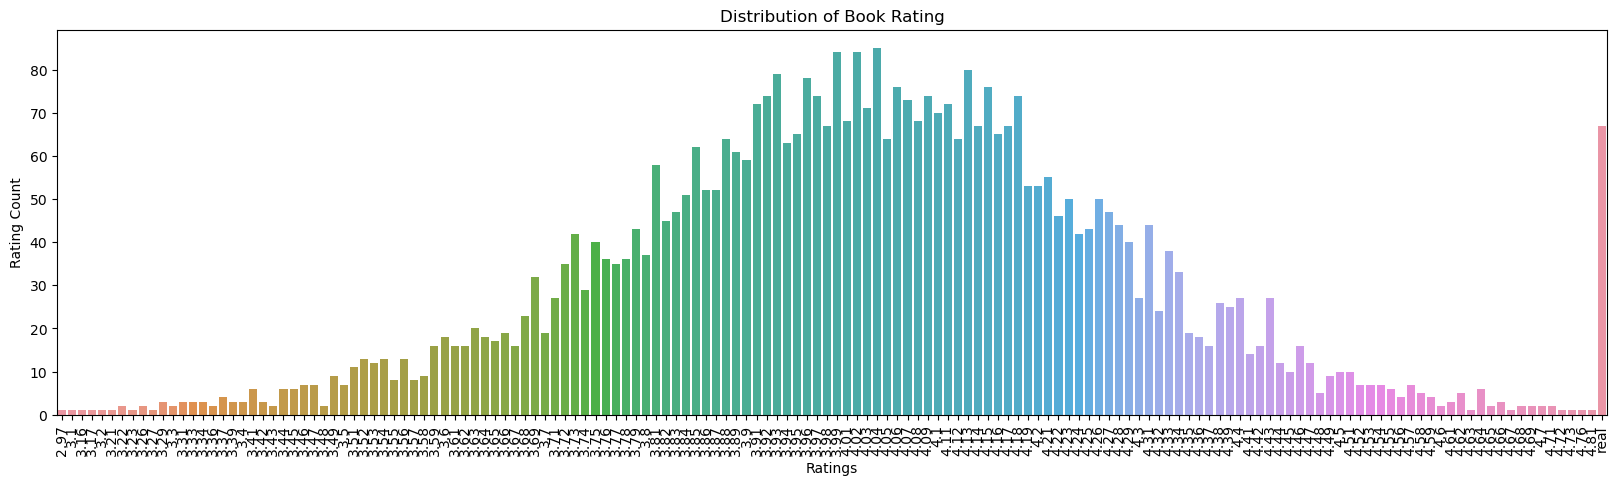

In [11]:
books_rating_distribution = df['Rating'].value_counts().sort_index()
plt.figure(figsize=(20, 5))
sns.barplot(x=books_rating_distribution.index, y=books_rating_distribution.values)
plt.title("Distribution of Book Rating")
plt.xlabel('Ratings')
plt.ylabel('Rating Count')
plt.xticks(rotation=90)
plt.show()

# How is the number of voters distributed for the books?

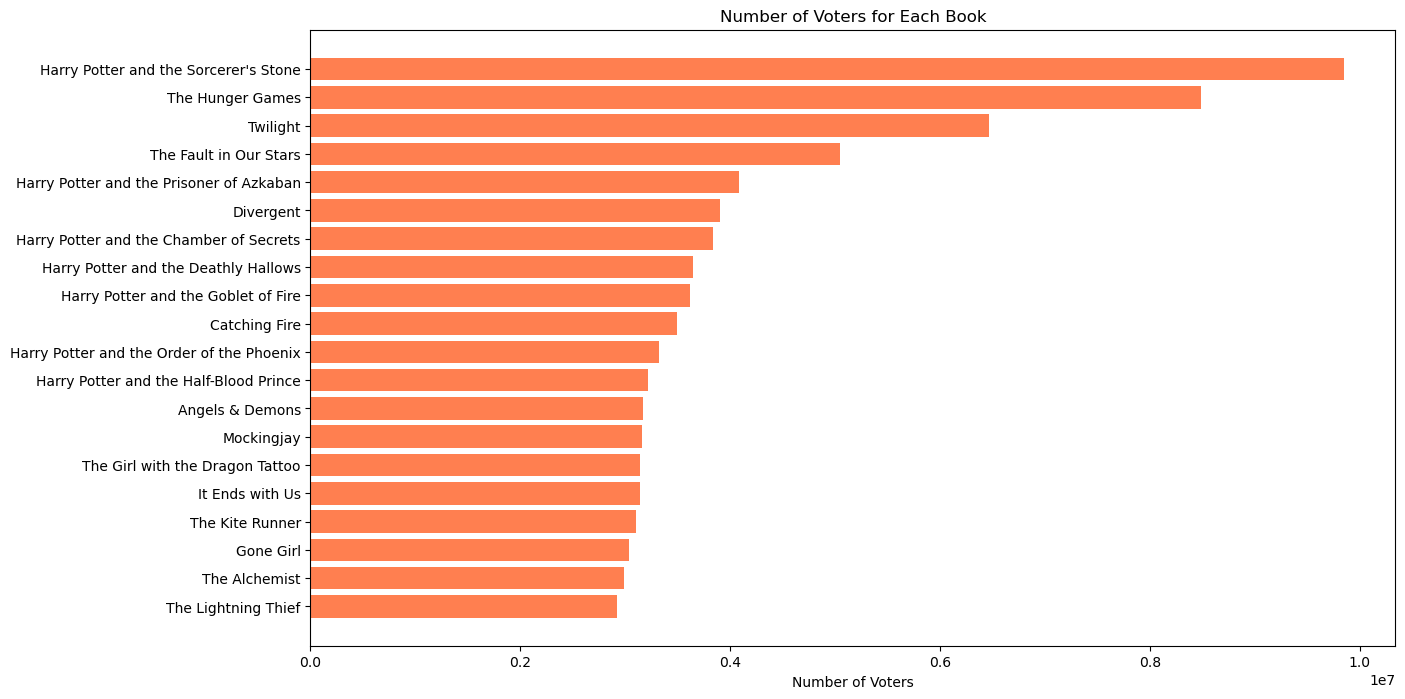

In [12]:
voters_distributed = df.groupby('Book')['Number of voters'].sum()
voters_distributed = voters_distributed.sort_values(ascending=False).head(20)
top_books = voters_distributed.index
voter_counts = voters_distributed.values

plt.figure(figsize=(14, 8))
plt.barh(top_books,voter_counts, color='coral')
plt.xlabel('Number of Voters')
plt.title('Number of Voters for Each Book')
plt.gca().invert_yaxis()
plt.show()

# Do books with more voters tend to have higher ratings?


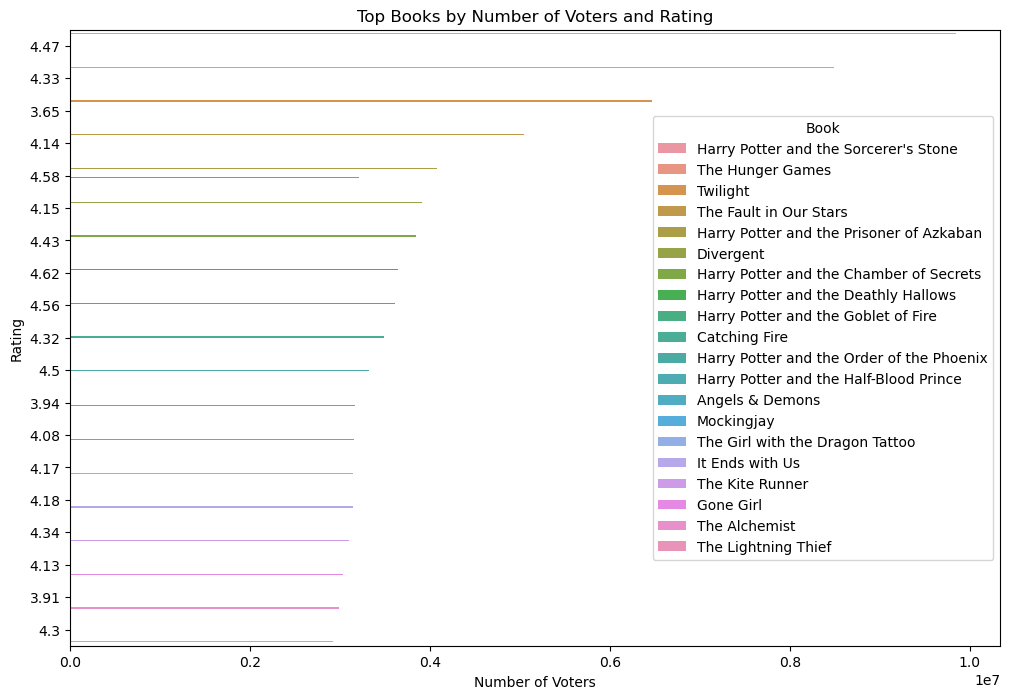

In [13]:
top_books = df.sort_values(by=['Number of voters', 'Rating'], ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of voters', y='Rating', hue='Book', data=top_books)
plt.title('Top Books by Number of Voters and Rating')
plt.xlabel('Number of Voters')
plt.ylabel('Rating')
plt.show()

# Is there any correlation between the number of pages and the book rating?

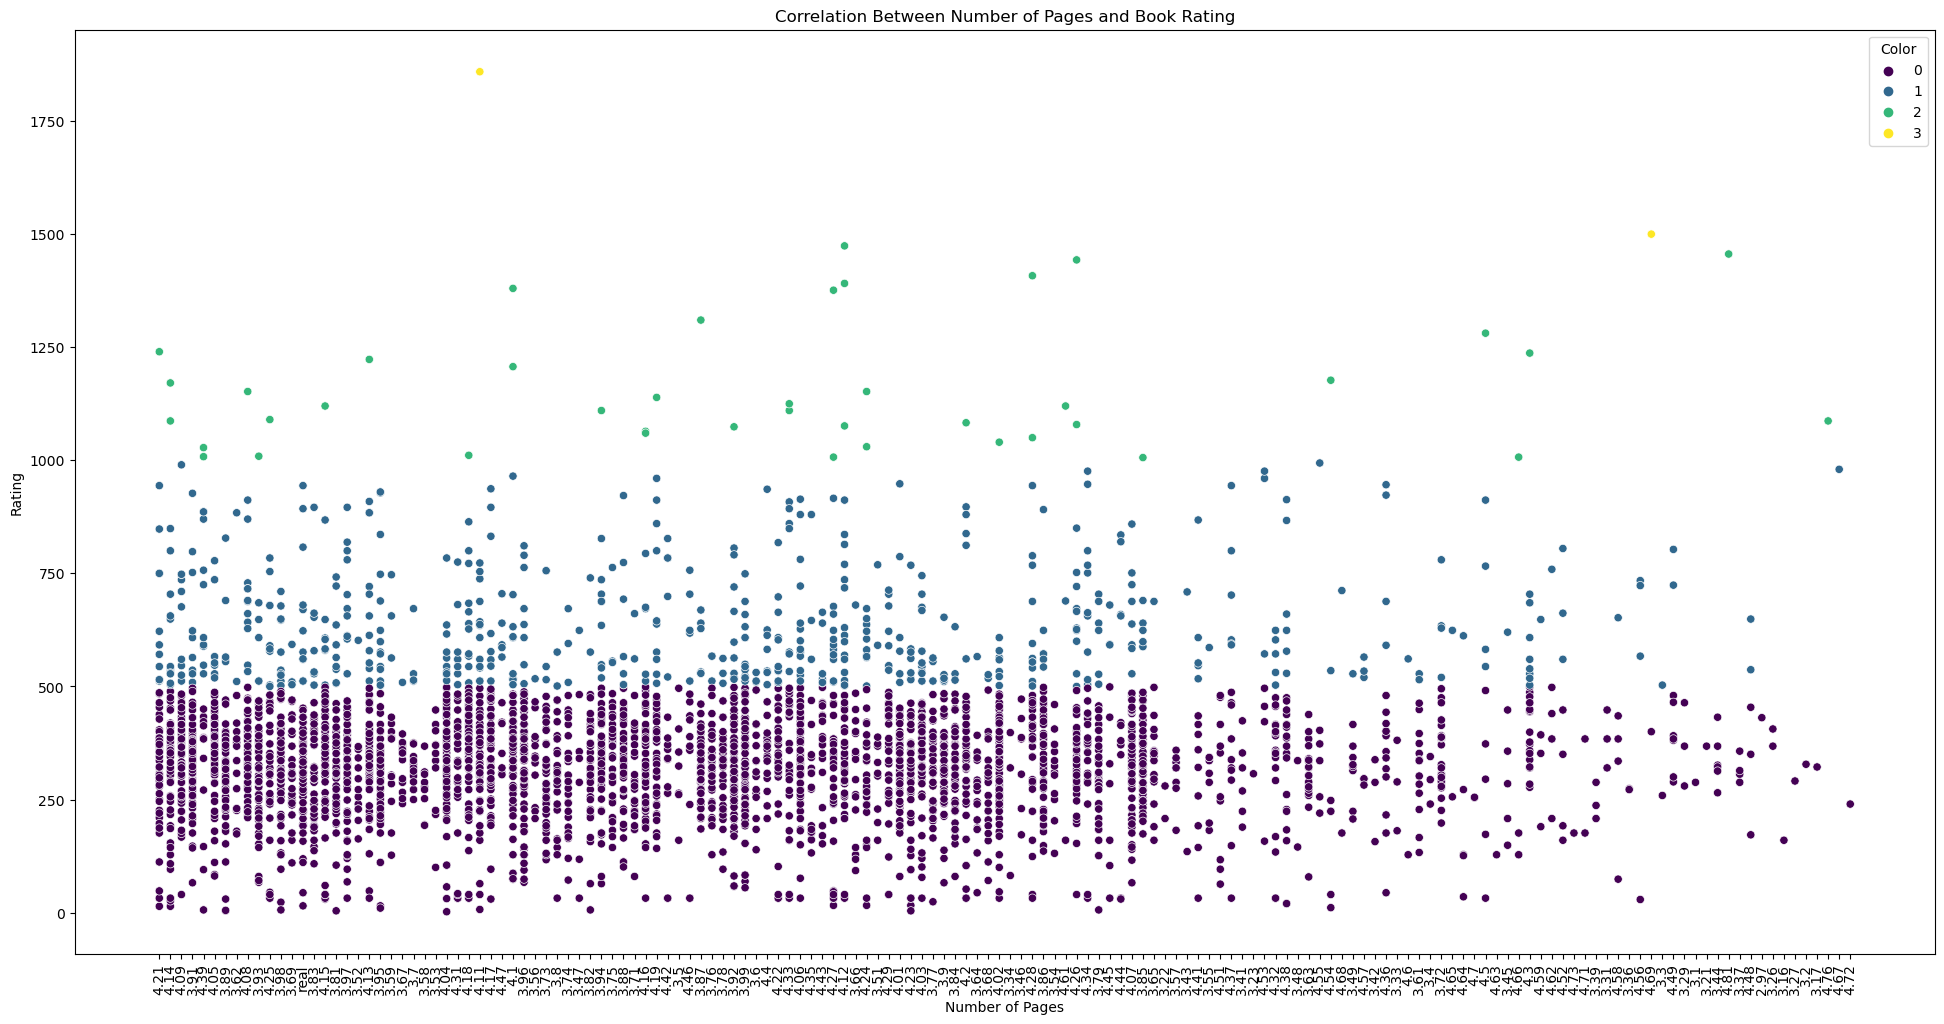

In [14]:
df['Color'] = (df['Num Pages'] // 500).astype(int)
plt.figure(figsize=(24, 12))
scatter_plot = sns.scatterplot(y='Num Pages', x='Rating', data=df, hue='Color', palette='viridis')
plt.title('Correlation Between Number of Pages and Book Rating')
plt.xlabel('Number of Pages')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

**The data suggests that books with fewer than 500 pages tend to receive higher ratings. This implies that shorter books may be more popular among readers.**

# How does the distribution of book lengths look like?

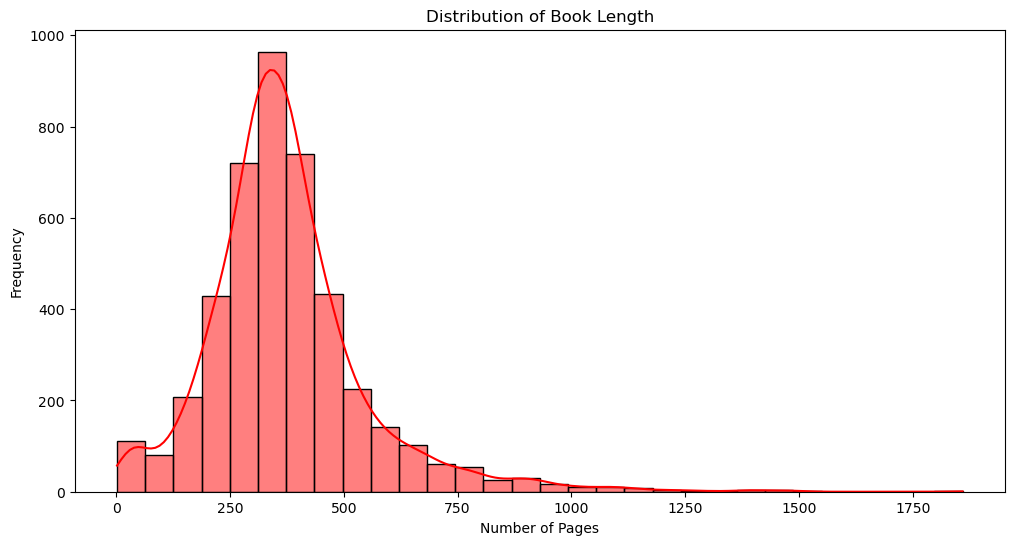

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Num Pages', bins=30, kde=True, color='red')
plt.title('Distribution of Book Length')
plt.xlabel('Number of Pages')
plt.ylabel('Frequency')
plt.show()

# What are the most common book formats in the dataset?

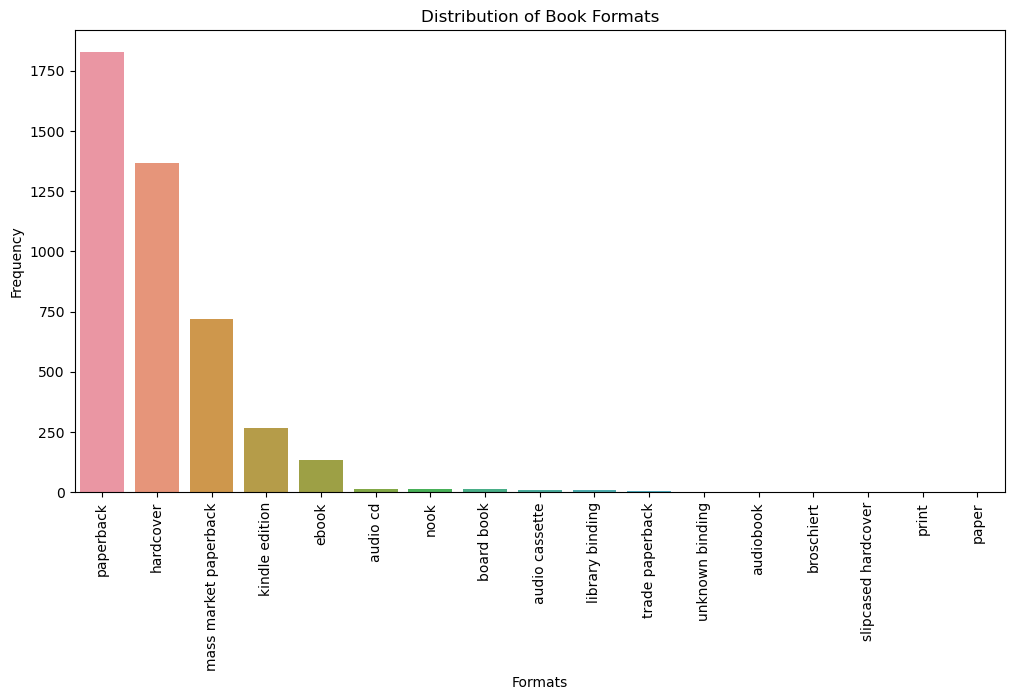

In [16]:
format_dist = df['Format'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x=format_dist.index, y = format_dist.values)
plt.title('Distribution of Book Formats')
plt.xlabel('Formats')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

**The most common book formats are paperback and hardcover**

# Are there seasonal patterns in book releases?

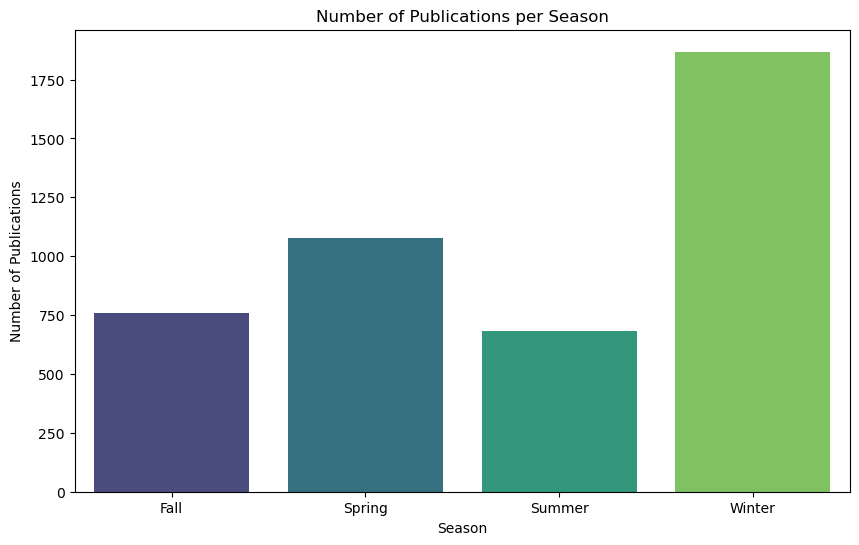

In [17]:
# LETS MAP
season_mapping = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Fall',
    10: 'Fall',
    11: 'Fall',
    12: 'Winter'
}

df['Season'] = df['Month'].map(season_mapping)
publications_per_season = df['Season'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=publications_per_season.index, y=publications_per_season.values, palette='viridis')
plt.title('Number of Publications per Season')
plt.xlabel('Season')
plt.ylabel('Number of Publications')

plt.show()

**"Winter emerges as the season with the highest number of publications."**

# Who are the most prolific authors in terms of the number of books published?

In [18]:
authors_count = df.groupby('Author')['Book'].count()
authors_count = authors_count.sort_values(ascending=False).head(15)

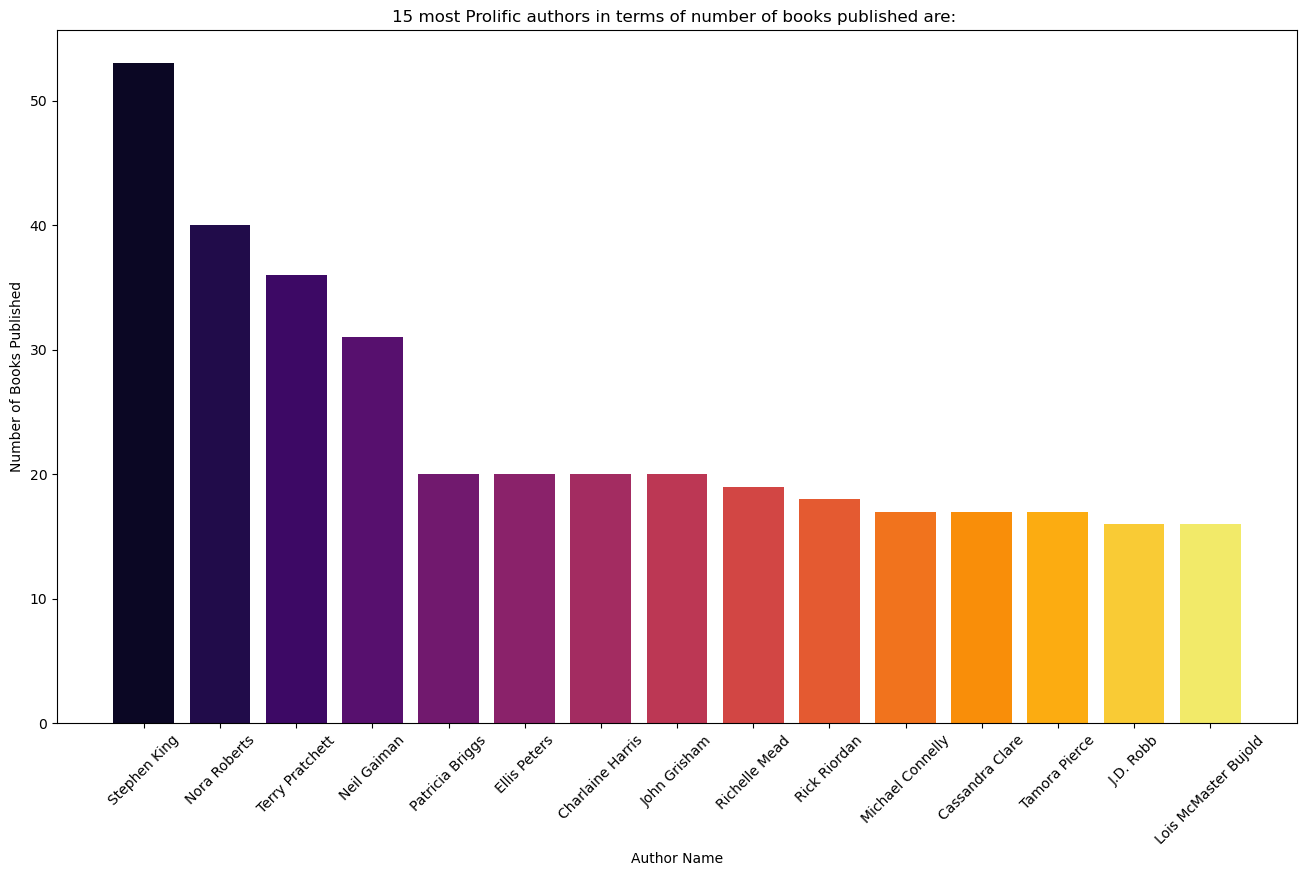

In [19]:
plt.figure(figsize=(16,9))
colors = sns.color_palette('inferno', len(authors_count))
plt.bar(authors_count.index, authors_count.values, color=colors)
plt.title("15 most Prolific authors in terms of number of books published are: ")
plt.xlabel("Author Name")
plt.ylabel("Number of Books Published")
plt.xticks(rotation=45)
plt.show()

# Modify the DataFrame by expanding the genres, ensuring that each row represents a single genre. Subsequently, categorize the genres into groups based on predefined categories and create a new column, 'Category,' to capture these groupings.

In [20]:
df['Genres'] = df['Genres'].apply(eval)

In [21]:
result_df = df.explode('Genres')
result_df

,Book,Author,Description,Num Pages,Format,Genres,Publication Date,Rating,Number of voters,Day,Month,Year,Color,Season
0,The Restaurant at the End of the Universe,Douglas Adams,Facing annihilation at the hands of the warlik...,250,paperback,Science Fiction,1980-10-12,4.21,283375,12,10,1980,0,Fall
0,The Restaurant at the End of the Universe,Douglas Adams,Facing annihilation at the hands of the warlik...,250,paperback,Fiction,1980-10-12,4.21,283375,12,10,1980,0,Fall
0,The Restaurant at the End of the Universe,Douglas Adams,Facing annihilation at the hands of the warlik...,250,paperback,Humor,1980-10-12,4.21,283375,12,10,1980,0,Fall
0,The Restaurant at the End of the Universe,Douglas Adams,Facing annihilation at the hands of the warlik...,250,paperback,Fantasy,1980-10-12,4.21,283375,12,10,1980,0,Fall
0,The Restaurant at the End of the Universe,Douglas Adams,Facing annihilation at the hands of the warlik...,250,paperback,Comedy,1980-10-12,4.21,283375,12,10,1980,0,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4399,Murder Your Employer: The McMasters Guide to H...,Rupert Holmes,A devilish thriller with a killer concept: The...,389,hardcover,Thriller,2023-02-21,3.9,19625,21,2,2023,0,Winter
4399,Murder Your Employer: The McMasters Guide to H...,Rupert Holmes,A devilish thriller with a killer concept: The...,389,hardcover,Mystery Thriller,2023-02-21,3.9,19625,21,2,2023,0,Winter
4399,Murder Your Employer: The McMasters Guide to H...,Rupert Holmes,A devilish thriller with a killer concept: The...,389,hardcover,Humor,2023-02-21,3.9,19625,21,2,2023,0,Winter
4399,Murder Your Employer: The McMasters Guide to H...,Rupert Holmes,A devilish thriller with a killer concept: The...,389,hardcover,Audiobook,2023-02-21,3.9,19625,21,2,2023,0,Winter


In [22]:
result_df.shape

(30419, 14)

In [23]:
# Mapping of specific genres to broader categories
genre_mapping = {
    'Science Fiction': 'Science Fiction',
    'Fiction': 'Fiction',
    'Fantasy': 'Fantasy',
    'Romance': 'Romance',
    'Mystery': 'Mystery',
    'Historical Fiction': 'Historical',
    'Literature': 'Fiction',
    'Adventure': 'Adventure',
    'Horror': 'Horror',
    'Thriller': 'Mystery',
    'Suspense': 'Mystery',
    'Nonfiction': 'Nonfiction',
    'Biography': 'Nonfiction',
    'Memoir': 'Nonfiction',
    'History': 'Nonfiction',
    'Philosophy': 'Nonfiction',
    'Action': 'Action',
    'Crime': 'Mystery',
    'Childrens': 'Childrens',
    'Young Adult': 'Young Adult',
    'Middle Grade': 'Young Adult',
    'Juvenile': 'Childrens',
    'Contemporary': 'Fiction',
    'Literary Fiction': 'Fiction',
    'Politics': 'Nonfiction',
    'Social Justice': 'Nonfiction',
    'African Literature': 'Literature',
    'Magical Realism': 'Fantasy',
    'India': 'Literature',
    'Music': 'Nonfiction',
    'Biography Memoir': 'Nonfiction',
    'Rock N Roll': 'Nonfiction',
    'Speculative Fiction': 'Fantasy',
    'Audiobook': 'Nonfiction',
    'Realistic Fiction': 'Fiction',
    'High Fantasy': 'Fantasy',
    'Epic Fantasy': 'Fantasy',
    'Short Stories': 'Fiction',
    'Mystery Thriller': 'Mystery',
    'Westerns': 'Regional and Historical',
    'Detective': 'Mystery',
    'Psychology': 'Nonfiction',
    'Self Help': 'Nonfiction',
    'Mental Health': 'Nonfiction',
    'Health': 'Nonfiction',
    'Personal Development': 'Nonfiction',
    'Magic': 'Fantasy',
    'Nobel Prize': 'Nonfiction',
    'Religion': 'Nonfiction',
    'Russia': 'Nonfiction',
    'Russian History': 'Nonfiction',
    'European History': 'Nonfiction',
    'War': 'Nonfiction',
    'Vampires': 'Fantasy',
    'Urban Fantasy': 'Fantasy',
    'Ireland': 'Nonfiction',
    'Irish Literature': 'Literature',
    'British Literature': 'Literature',
    'Sci Fi Fantasy': 'Fantasy',
    'Tudor Period': 'Historical',
    '16th Century': 'Historical',
    'Victorian': 'Historical',
    'Supernatural': 'Fantasy',
    'Ghosts': 'Horror',
    'True Crime': 'Nonfiction',
    'Autobiography': 'Nonfiction',
    'Picture Books': 'Childrens',
    'Dragons': 'Fantasy',
    'Fairy Tales': 'Fantasy',
    'Fashion': 'Nonfiction',
    'Pop Culture': 'Nonfiction',
    'Horses': 'Nonfiction',
    'Writing': 'Nonfiction',
    'Southern Gothic': 'Fiction',
    'Star Wars': 'Science Fiction',
    'Space Opera': 'Science Fiction',
    'Coming Of Age': 'Fiction',
    'Algeria': 'Nonfiction',
    'France': 'Nonfiction',
    'Feminism': 'Nonfiction',
    'LGBT': 'Nonfiction',
    'Lesbian': 'Nonfiction',
    'Queer': 'Nonfiction',
    'Gender': 'Nonfiction',
    'China': 'Nonfiction',
    'Asian Literature': 'Literature',
    'School': 'Fiction',
    'Australia': 'Nonfiction',
    'Hard Boiled': 'Mystery',
    '20th Century': 'Historical',
    'Animals': 'Nonfiction',
    'Gothic': 'Horror',
    'Drama': 'Fiction',
    'Canada': 'Nonfiction',
    'Jewish': 'Nonfiction',
    'Canadian Literature': 'Literature',
    'Indian Literature': 'Literature',
    'Asia': 'Nonfiction',
    'Teen': 'Young Adult',
    'Dystopia': 'Science Fiction',
    'Post Apocalyptic': 'Science Fiction',
    'Robots': 'Science Fiction',
    'Military Fiction': 'Nonfiction',
    'World War II': 'Historical',
    'Travel': 'Nonfiction',
    'Nature': 'Nonfiction',
    'Japan': 'Nonfiction',
    'Essays': 'Nonfiction',
    'Japanese Literature': 'Literature',
    'Art': 'Fine Arts',
    'Art History': 'Fine Arts',
    'Design': 'Nonfiction',
    'Reference': 'Nonfiction',
    'Fables': 'Fiction',
    'Photography': 'Nonfiction',
    'Theory': 'Nonfiction',
    'Poetry': 'Nonfiction',
    'Time Travel': 'Science Fiction',
    'African American': 'Nonfiction',
    'Race': 'Nonfiction',
    'International': 'Nonfiction',
    'Cozy Mystery': 'Mystery',
    'Chick Lit': 'Fiction',
    'Contemporary Romance': 'Romance',
    'Chapter Books': 'Childrens',
    '2nd Grade': 'Childrens',
    'Anthologies': 'Fiction',
    'Christianity': 'Nonfiction',
    'Sexuality': 'Nonfiction',
    'Aliens': 'Science Fiction',
    'Boarding School': 'Fiction',
    'Graphic Novels': 'Comics',
    'Adult': 'Fiction',
    'Spanish Literature': 'Literature',
    'Books About Books': 'Nonfiction',
    'Swedish Literature': 'Literature',
    'Latin American': 'Nonfiction',
    'Egypt': 'Nonfiction',
    'Relationships': 'Nonfiction',
    'Marriage': 'Nonfiction',
    'Christian': 'Nonfiction',
    'Anthropology': 'Nonfiction',
    'Biology': 'Nonfiction',
    'Evolution': 'Nonfiction',
    'Unfinished': 'Nonfiction',
    'Adult Fiction': 'Fiction',
    'Natural History': 'Nonfiction',
    'Presidents': 'Nonfiction',
    'Christmas': 'Nonfiction',
    'Hugo Awards': 'Science Fiction',
    'Geography': 'Nonfiction',
    'Americana': 'Nonfiction',
    'Geology': 'Nonfiction',
    'Nigeria': 'Nonfiction',
    'Noir': 'Mystery',
    'Banned Books': 'Nonfiction',
    'Holocaust': 'Nonfiction',
    'Germany': 'Nonfiction',
    'German Literature': 'Literature',
    'Horse Racing': 'Nonfiction',
    'Business': 'Nonfiction',
    'Leadership': 'Nonfiction',
    'Management': 'Nonfiction',
    'Productivity': 'Nonfiction',
    'Holiday': 'Nonfiction',
    'Italy': 'Nonfiction',
    'Survival': 'Nonfiction',
    'Polish Literature': 'Literature',
    'Poland': 'Nonfiction',
    'Plays': 'Drama',
    'Theatre': 'Drama',
    'Womens': 'Nonfiction',
    'Retellings': 'Fiction',
    'Communication': 'Nonfiction',
    'Maps': 'Nonfiction',
    'Collections': 'Fiction',
    'Russian Literature': 'Literature',
    'Sword and Sorcery': 'Fantasy',
    'Folklore': 'Fantasy',
    'Medical': 'Nonfiction',
    'Architecture': 'Nonfiction',
    'Journalism': 'Nonfiction',
    'Criticism': 'Nonfiction',
    'Arthurian': 'Fantasy',
    'Mythology': 'Fantasy',
    'Young Adult Fantasy': 'Young Adult',
    'Kids': 'Childrens',
    'Storytime': 'Childrens',
    'Civil War': 'Historical',
    'Comics': 'Comics',
    'Comic Strips': 'Comics',
    'Cartoon': 'Comics',
    '15th Century': 'Historical',
    'Plantagenet': 'Historical',
    'Spirituality': 'Nonfiction',
    'Taoism': 'Nonfiction',
    'Conspiracy Theories': 'Nonfiction',
    'Witches': 'Fantasy',
    'Graphic Novels Comics': 'Comics',
    'Novella': 'Fiction',
    'Family': 'Fiction',
    'Cultural': 'Nonfiction',
    'Money': 'Nonfiction',
    'Murder Mystery': 'Mystery',
    'Latin American Literature': 'Literature',
    'Spain': 'Nonfiction',
    'Dying Earth': 'Fantasy',
    'Romania': 'Nonfiction',
    'Scandinavian Literature': 'Literature',
    'Finnish Literature': 'Literature',
    'Star Trek': 'Science Fiction',
    'Media Tie In': 'Fiction',
    'Star Trek Original Series': 'Science Fiction',
    'Cookbooks': 'Nonfiction',
    'Food and Drink': 'Nonfiction',
    'Romantic Suspense': 'Romance',
    'Denmark': 'Nonfiction',
    'Iran': 'Nonfiction',
    'Food': 'Nonfiction',
    'Historical Romance': 'Romance',
    'Native Americans': 'Nonfiction',
    'Beauty and The Beast': 'Fantasy',
    'Regency': 'Romance',
    'Lebanon': 'Nonfiction',
    'Brazil': 'Nonfiction',
    'Portuguese Literature': 'Literature',
    'Sociology': 'Nonfiction',
    'Parenting': 'Nonfiction',
    'Education': 'Nonfiction',
    'Teaching': 'Nonfiction',
    'Scotland': 'Nonfiction',
    '11th Century': 'Historical',
    'Sports': 'Nonfiction',
    'Baseball': 'Nonfiction',
    'New York': 'Nonfiction',
    'Werewolves': 'Fantasy',
    'Pakistan': 'Nonfiction',
    'Steampunk': 'Science Fiction',
    'Alternate History': 'Science Fiction',
    'Historical Fantasy': 'Fantasy',
    'Spy Thriller': 'Mystery',
    'Chess': 'Nonfiction',
    'Greek Mythology': 'Fantasy',
    'Cats': 'Nonfiction',
    'High School': 'Young Adult',
    'Read For School': 'Nonfiction',
    'Psychoanalysis': 'Nonfiction',
    'Sweden': 'Nonfiction',
    'Modern Classics': 'Fiction',
    'Turkish Literature': 'Literature',
    'Turkish': 'Nonfiction',
    'Weird Fiction': 'Fantasy',
    'Western Romance': 'Romance',
    'Witchcraft': 'Fantasy',
    'Cooking': 'Nonfiction',
    'Category Romance': 'Romance',
    'fiction': 'Fiction',
    'Crafts': 'Nonfiction',
    'Literary Criticism': 'Nonfiction',
    'Czech Literature': 'Literature',
    'Cyberpunk': 'Science Fiction',
    'French Literature': 'Literature',
    'Dark': 'Fantasy',
    'Heroic Fantasy': 'Fantasy',
    'Dragonlance': 'Fantasy',
    'Manga': 'Comics',
    'Gothic Romance': 'Romance',
    'Language': 'Nonfiction',
    'Linguistics': 'Nonfiction',
    'Dinosaurs': 'Nonfiction',
    'Israel': 'Nonfiction',
    'Christian Fiction': 'Fiction',
    'Popular Science': 'Nonfiction',
    'Quantum Mechanics': 'Nonfiction',
    'Dark Fantasy': 'Fantasy',
    'Portugal': 'Nonfiction',
    'The United States Of America': 'Nonfiction',
    'American Fiction': 'Fiction',
    'Seinen': 'Comics',
    'Halloween': 'Nonfiction',
    'Gardening': 'Nonfiction',
    'Medicine': 'Nonfiction',
    'Neuroscience': 'Nonfiction',
    'Womens Fiction': 'Fiction',
    'Apocalyptic': 'Science Fiction',
    'Roman': 'Fiction',
    'Animal Fiction': 'Fiction',
    'Judaism': 'Nonfiction',
    'Regency Romance': 'Romance',
    'Ancient History': 'Historical',
    'Ancient': 'Historical',
    'Culinary': 'Nonfiction',
    'New Weird': 'Fantasy',
    'Paranormal Romance': 'Romance',
    'Science Fiction Romance': 'Science Fiction',
    'Love': 'Romance',
    'Legal Thriller': 'Mystery',
    'Batman': 'Comics',
    'Comic Book': 'Comics',
    'Dc Comics': 'Comics',
    'Atheism': 'Nonfiction',
    'World History': 'Nonfiction',
    '19th Century': 'Historical',
    'Dogs': 'Nonfiction',
    'Film': 'Nonfiction',
    'Cult Classics': 'Fiction',
    'Shojo': 'Comics',
    'Inspirational': 'Nonfiction',
    'Transport': 'Nonfiction',
    'Stories': 'Fiction',
    'American Civil War': 'Historical',
    'Military History': 'Nonfiction',
    'Ghost Stories': 'Horror',
    'Pirates': 'Adventure',
    'Economics': 'Nonfiction',
    'Government': 'Nonfiction',
    'Environment': 'Nonfiction',
    'Class': 'Nonfiction',
    'Epic': 'Fantasy',
    'Fae': 'Fantasy',
    '1st Grade': 'Childrens',
    'Hungary': 'Nonfiction',
    'Hungarian Literature': 'Literature',
    'Military Science Fiction': 'Science Fiction',
    'Book Club': 'Fiction',
    'Gender Studies': 'Nonfiction',
    'Lds Fiction': 'Fiction',
    'Lds': 'Nonfiction',
    'Musicals': 'Nonfiction',
    'Female Authors': 'Nonfiction',
    'Academic': 'Nonfiction',
    'College': 'Nonfiction',
    'Chinese Literature': 'Literature',
    'Post Colonial': 'Nonfiction',
    'Faith': 'Nonfiction',
    'Theology': 'Nonfiction',
    'Football': 'Nonfiction',
    'Mountaineering': 'Nonfiction',
    'Zimbabwe': 'Nonfiction',
    'Forgotten Realms': 'Fantasy',
    'Dungeons and Dragons': 'Fantasy',
    '18th Century': 'Historical',
    'Harem': 'Romance',
    'Disability': 'Nonfiction',
    'Finance': 'Nonfiction',
    'Counting': 'Childrens',
    'Mathematics': 'Nonfiction',
    'French Revolution': 'Historical',
    'Psychological Thriller': 'Mystery',
    'Art': 'Fine Arts',
    'galiza': 'Nonfiction',
    'hespaña': 'Nonfiction',
    'Mental Illness': 'Nonfiction',
    'Archaeology': 'Nonfiction',
    'Buddhism': 'Nonfiction',
    'Futuristic': 'Science Fiction',
    'Harlequin': 'Romance',
    'Political Science': 'Nonfiction',
    'Buisness': 'Nonfiction',
    'Art Design': 'Fine Arts',
    'Church': 'Nonfiction',
    'Death': 'Nonfiction',
    'World War I': 'Historical',
    'Medieval Romance': 'Romance',
    'M F Romance': 'Romance',
    'Travelogue': 'Nonfiction',
    'Abuse': 'Nonfiction',
    'Medieval History': 'Historical',
    'Ecology': 'Nonfiction',
    'Sustainability': 'Nonfiction',
    'Climate Change': 'Nonfiction',
    'Romanovs': 'Nonfiction',
    'Modern': 'Nonfiction',
    'Danish': 'Nonfiction',
    'Herbs': 'Nonfiction',
    'Nordic Noir': 'Mystery',
    'Christian Living': 'Nonfiction',
    'Greece': 'Nonfiction',
    'Comic Fantasy': 'Fantasy',
    'Skepticism': 'Nonfiction',
    'Angels': 'Fantasy',
    'Law': 'Nonfiction',
    'Sports Romance': 'Romance',
    'Technology': 'Nonfiction',
    'Academia': 'Nonfiction',
    '12th Century': 'Historical',
    'M M Romance': 'Romance',
    '17th Century': 'Historical',
    'Back To School': 'Fiction',
    'Gay': 'LGBT',
    'American Revolution': 'Historical',
    'Ukraine': 'Nonfiction',
    'Semiotics': 'Nonfiction',
    'Botswana': 'Nonfiction',
    'Rwanda': 'Nonfiction',
    'Police': 'Mystery',
    'How To': 'Nonfiction',
    'Cities': 'Nonfiction',
    'Society': 'Nonfiction',
    'Computer Science': 'Nonfiction',
    'Microhistory': 'Nonfiction',
    'Food History': 'Nonfiction',
    'Disease': 'Nonfiction',
    'Home Economics': 'Nonfiction',
    'Fairy Tale Retellings': 'Fantasy',
    'Amish': 'Nonfiction',
    'Poverty': 'Nonfiction',
    'Erotica': 'Romance',
    'Foodie': 'Nonfiction',
    'Autistic Spectrum Disorder': 'Nonfiction',
    'Railways': 'Nonfiction',
    'Adoption': 'Nonfiction',
    'Mermaids': 'Fantasy',
    'Singularity': 'Science Fiction',
    'Cults': 'Nonfiction',
    'Growth Mindset': 'Nonfiction',
    'Bangladesh': 'Nonfiction',
    'Fairies': 'Fantasy',
    'Food Writing': 'Nonfiction',
    'Shapeshifters': 'Fantasy',
    '21st Century': 'Fiction',
    'Zombies': 'Horror',
    'Nutrition': 'Nonfiction',
    'Fantasy Romance': 'Romance',
    'Terrorism': 'Nonfiction',
    'Sudan': 'Nonfiction',
    'Amazon': 'Nonfiction',
    'Demons': 'Fantasy',
    'New Adult': 'Romance',
    'Ethiopia': 'Nonfiction',
    'Road Trip': 'Fiction',
    'Young Adult Contemporary': 'Young Adult',
    'Polygamy': 'Romance',
    'BDSM': 'Romance',
    'Erotic Romance': 'Romance',
    'Love Story': 'Romance',
    'Fighters': 'Romance',
    'Motorcycle': 'Romance',
    'Musicians': 'Nonfiction',
    'Menage': 'Romance',
    'New Adult Romance': 'Romance',
    'M M F': 'Romance',
    'European Literature': 'Literature',
    'Google': 'Nonfiction',
    'Gay For You': 'LGBT',
    'Soldiers': 'Nonfiction',
    'Hockey': 'Nonfiction',
    'Military Romance': 'Romance',
    'Racing': 'Nonfiction',
    'M M Contemporary': 'Romance',
    'Superheroes': 'Comics',
    'Young Adult Romance': 'Young Adult',
    'Bulgaria': 'Nonfiction',
    'Young Adult Science Fiction': 'Young Adult',
    'Reverse Harem': 'Romance',
    'Anti Racist': 'Nonfiction',
    'Christian Non Fiction': 'Nonfiction',
    'Transgender': 'LGBT',
    'Basketball': 'Nonfiction',
    'Historical' :'Historical',
    'Science Fiction Fantasy':'Science Fiction',
    'Paranormal':'Science Fiction',
    'Comedy':'Comedy',
    'Humor':'Comedy',
    'Classics':'Classics',
    'Science':'Science',
    'Space':'Science',
    'Physics':'Science',
    'Espionage':'Mystery',
    'Novels':'Comics',
    'Astronomy':'Science',
    'Prehistoric':'Historical',
    'Italian Literature':'Literature',
    'Historical Mystery':'Historical',
    'American':'Regional and Historical',
    'Medieval':'Historical',
    'Southern':'Regional and Historical',
    'Africa':'Regional and Historical',
    'American History':'Regional and Historical',
    'South Africa':'Regional and Historical',
    'art':'Fine Arts'
}

# Apply the mapping to create a new 'Category' column
result_df['Category'] = result_df['Genres'].map(genre_mapping)

In [24]:
result_df['Category'] = result_df['Category'].str.lower()

In [25]:
result_df['Category'].value_counts()

Category
fiction                    6971
nonfiction                 4968
fantasy                    3697
mystery                    3367
romance                    2731
science fiction            1875
historical                 1694
young adult                1419
comics                      710
childrens                   475
comedy                      458
adventure                   407
literature                  386
classics                    366
horror                      341
regional and historical     260
science                     153
drama                        48
action                       40
fine arts                    38
lgbt                          5
Name: count, dtype: int64

In [26]:
result_df.isnull().sum()

Book                 0
Author               0
Description          0
Num Pages            0
Format               0
Genres              10
Publication Date     0
Rating               0
Number of voters     0
Day                  0
Month                0
Year                 0
Color                0
Season               0
Category            10
dtype: int64

In [27]:
result_df = result_df.dropna(subset=['Category'])

# How is the Distribution of Genres in the Dataset?

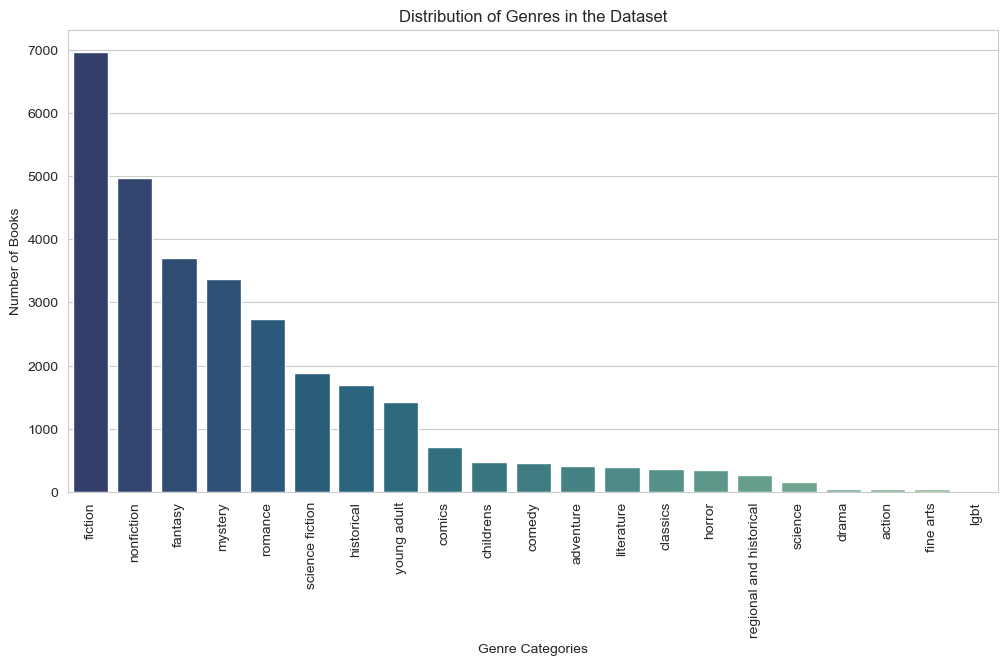

In [28]:
sns.set_style('whitegrid')
genre_category_count = result_df['Category'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plot = sns.barplot(x=genre_category_count.index, y=genre_category_count.values,palette='crest_r',
                   order=genre_category_count.index, )
plot.set_title('Distribution of Genres in the Dataset')
plot.set_xlabel('Genre Categories')
plot.set_ylabel('Number of Books')
plt.xticks(rotation=90)
plt.show()

In [29]:
from matplotlib import colormaps
print(list(colormaps))

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

# Do certain genres prefer specific formats?

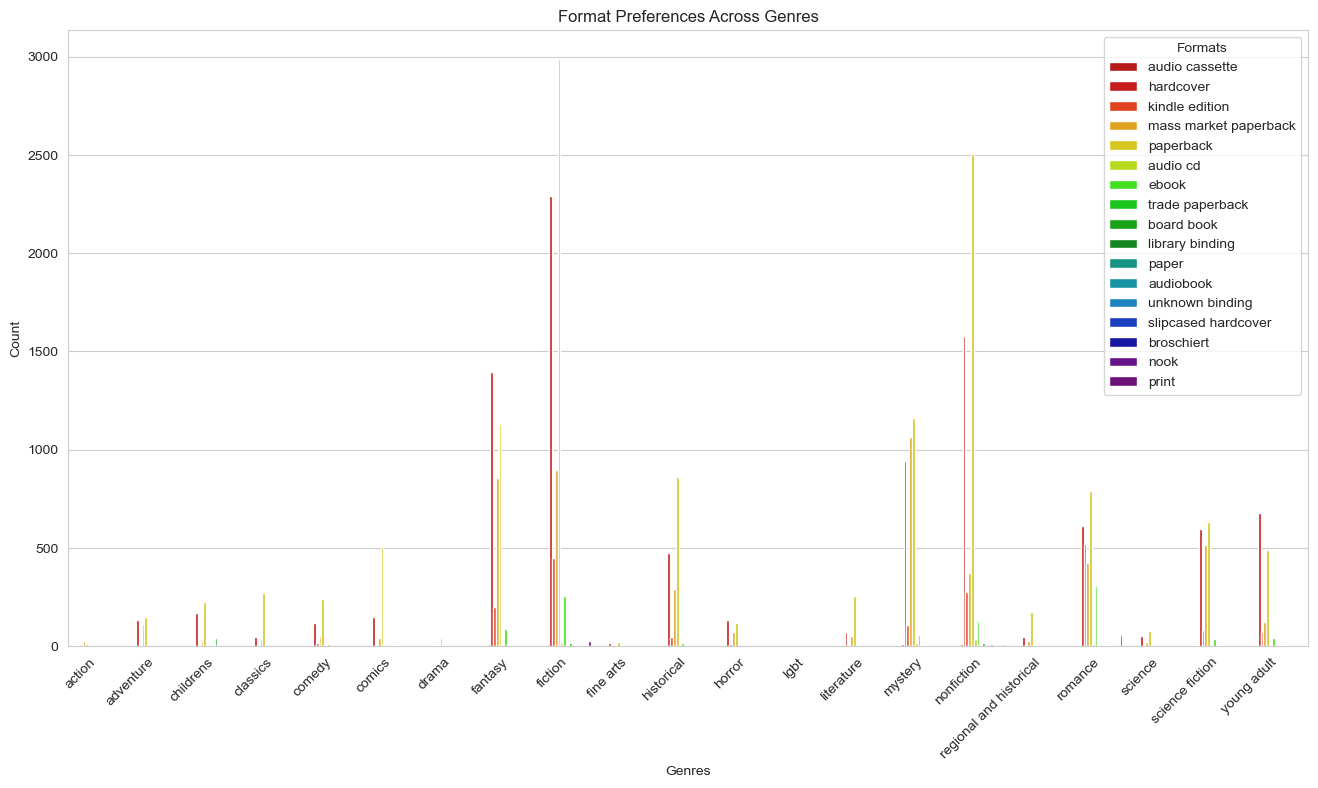

In [30]:
genre_format_count = result_df.groupby(['Category', 'Format']).size().reset_index(name='Count')
plt.figure(figsize=(16, 8))
sns.barplot(data=genre_format_count, x='Category', y='Count', hue='Format', palette='nipy_spectral_r', ci=None)
plt.title('Format Preferences Across Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.legend(title='Formats', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.show()

# Do certain authors specialize in specific genres?

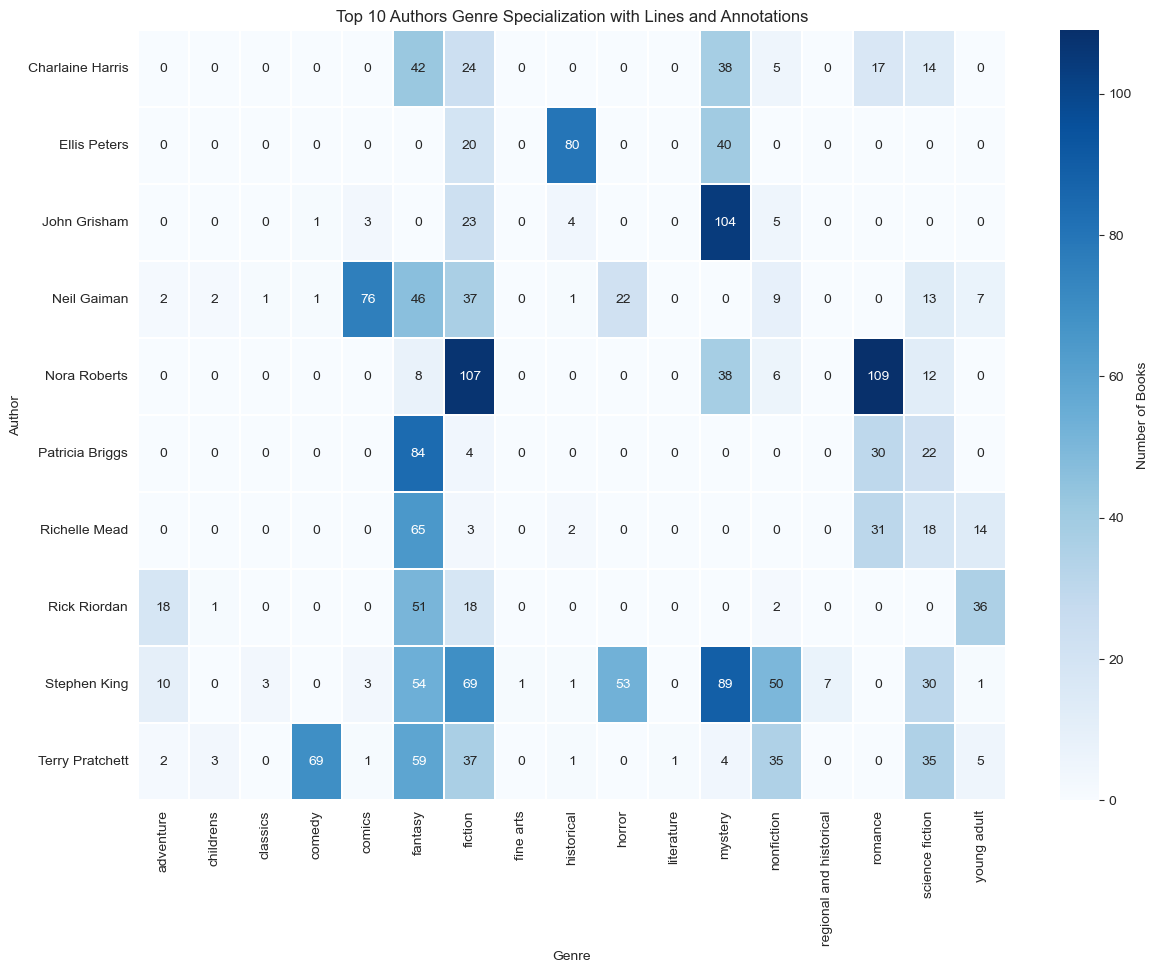

In [31]:
top_authors = result_df['Author'].value_counts().head(10).index
top_authors_df = result_df[result_df['Author'].isin(top_authors)]
authors_genres_pivot = top_authors_df.pivot_table(index='Author', columns='Category', aggfunc='size', fill_value=0)
plt.figure(figsize=(14, 10))
sns.heatmap(authors_genres_pivot, cmap='Blues', linecolor='white', linewidths=0.1, annot=True, fmt='d', cbar_kws={'label': 'Number of Books'})
plt.title('Top 10 Authors Genre Specialization with Lines and Annotations')
plt.xlabel('Genre')
plt.ylabel('Author')
plt.show()

# Are there trends in the types of genres that become popular in different decades?

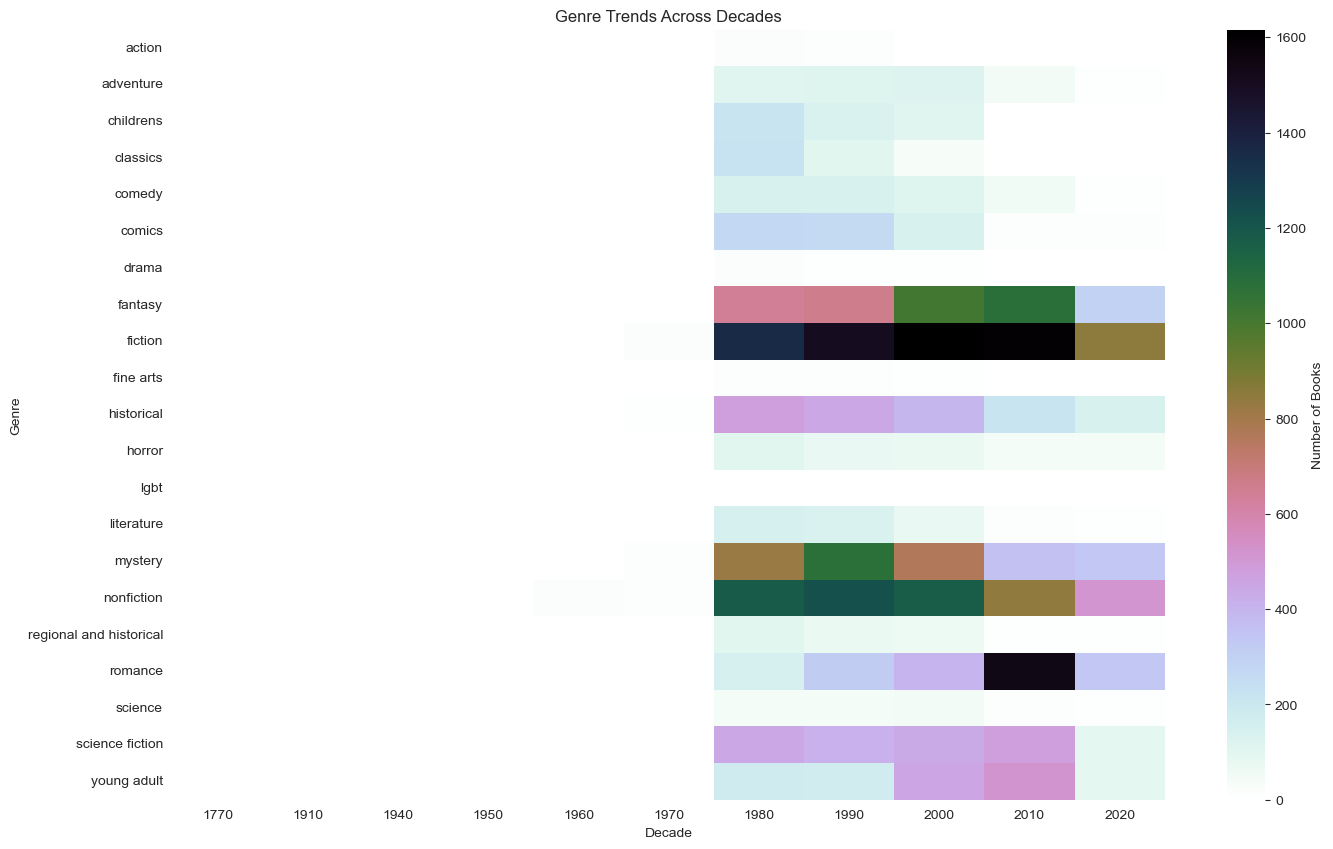

In [32]:
result_df['Decade'] = (result_df['Year'] // 10) * 10
genres_decades_pivot = result_df.pivot_table(index='Category', columns='Decade', aggfunc='size', fill_value=0)
plt.figure(figsize=(16, 10))
sns.heatmap(genres_decades_pivot, cmap='cubehelix_r', cbar_kws={'label': 'Number of Books'})
plt.title('Genre Trends Across Decades')
plt.xlabel('Decade')
plt.ylabel('Genre')
plt.show()